In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)
sns.set_palette("Dark2")

results = pd.read_parquet("./sampling_scaling_rtt.gzip")

# only look at the empirical-high timing model (ground truth)
results = results[results["timing_model"] == "empirical-high"].copy()
results["timing_model"] = results["timing_model"].cat.remove_unused_categories()
results["sampling_scheme"] = results["sampling_scheme"].astype(
    pd.CategoricalDtype(
        ['greedy',
         'ideal',
         'adaptive-empirical',
         'adaptive-theoretical-exgaussian',
         'adaptive-theoretical-rayleigh',
         'adaptive-fitted-naive',
         'adaptive-constant-Q1-3.9s',
         'adaptive-constant-Q2-5.2s',
         'adaptive-constant-Q3-7.0s',
         'adaptive-power-empirical',
         'adaptive-power-theoretical-exgaussian',
         'adaptive-power-theoretical-rayleigh',
         'adaptive-power-fitted-naive',
         'adaptive-power-constant-Q1-3.9s',
         'adaptive-power-constant-Q2-5.2s',
         'adaptive-power-constant-Q3-7.0s',
         'periodic-1.0s',
         'periodic-3.0s',
         'periodic-5.0s',
         'hold-1.0s',
         'hold-3.0s',
         'hold-5.0s'], ordered=True
        )
)

def _classify_sampling(s: str) -> str:
    ssplit = s.split("-")
    if len(ssplit) > 1:
        if ssplit[0] == "adaptive":
            if ssplit[1] == "power":
                return "adaptive-energy"
            else:
                return "adaptive-ttf"
        return ssplit[0]
    else:
        return "reference"

results["sampling_class"] = (
    results["sampling_scheme"]
    .apply(_classify_sampling)
    .astype(pd.CategoricalDtype(["adaptive-energy", "adaptive-ttf", "reference", "periodic", "hold"]))
)

# remove the realistic-low, high adaptive schemes
# results = results[~results["sampling_scheme"].str.endswith("low") & ~results["sampling_scheme"].str.endswith("high")]
results["sampling_scheme"] = results["sampling_scheme"].cat.remove_unused_categories()

results

,rtt,step,previous_ttf,execution_time,step_duration,ttf,wait_time,samples,cumulative_duration,cumulative_samples,repetition,energy,cumulative_energy,timing_model,sampling_scheme,sampling_class
0,1.0,1,1.000000,3.339578,4.410716,1.071138,0.071138,3,4.410716,3,6,0.129161,0.129161,empirical-high,adaptive-constant-Q1-3.9s,adaptive-ttf
1,1.0,2,1.071138,8.504468,9.631859,1.127392,0.127392,6,14.042575,9,6,0.270478,0.399639,empirical-high,adaptive-constant-Q1-3.9s,adaptive-ttf
2,1.0,3,1.127392,3.158377,5.106543,1.948166,0.948166,2,19.149118,11,6,0.118598,0.518237,empirical-high,adaptive-constant-Q1-3.9s,adaptive-ttf
3,1.0,4,1.948166,4.674564,7.103813,2.429250,1.429250,3,26.252932,14,6,0.169557,0.687794,empirical-high,adaptive-constant-Q1-3.9s,adaptive-ttf
4,1.0,5,2.429250,2.787680,3.991262,1.203582,0.203582,1,30.244194,15,6,0.080869,0.768663,empirical-high,adaptive-constant-Q1-3.9s,adaptive-ttf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296995,4.5,41,5.511139,11.478102,19.500000,8.021898,3.521898,3,569.500000,77,30,0.670500,18.244500,empirical-high,periodic-5.0s,periodic
296996,4.5,42,8.021898,6.569055,14.500000,7.930945,3.430945,2,584.000000,79,30,0.469500,18.714000,empirical-high,periodic-5.0s,periodic
296997,4.5,43,7.930945,3.233016,9.500000,6.266984,1.766984,1,593.500000,80,30,0.268500,18.982500,empirical-high,periodic-5.0s,periodic
296998,4.5,44,6.266984,6.803729,14.500000,7.696271,3.196271,2,608.000000,82,30,0.469500,19.452000,empirical-high,periodic-5.0s,periodic


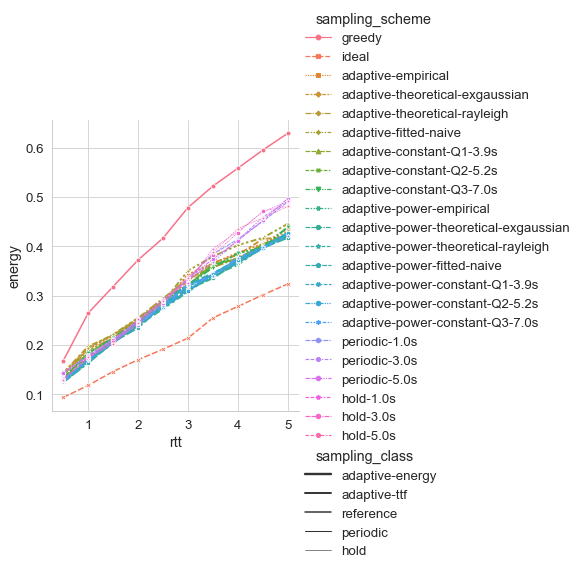

In [2]:
fg = sns.relplot(
    kind="line",
    errorbar=None,
    data=results,
    x="rtt",
    y="energy",
    hue="sampling_scheme",
    style="sampling_scheme",
    size="sampling_class",
    markers=True,
)
plt.show()

In [3]:
energy_at_max_rtt = (
    results[results["rtt"] == results["rtt"].max()]
    .groupby("sampling_scheme")
    ["energy"]
    .mean()
    .sort_values()
)
energy_at_max_rtt

sampling_scheme
ideal                                    0.323632
adaptive-power-theoretical-exgaussian    0.417816
adaptive-theoretical-exgaussian          0.418585
adaptive-power-empirical                 0.420713
adaptive-constant-Q1-3.9s                0.420872
adaptive-power-constant-Q3-7.0s          0.421004
adaptive-constant-Q2-5.2s                0.425113
adaptive-power-fitted-naive              0.425196
adaptive-power-theoretical-rayleigh      0.425736
adaptive-power-constant-Q2-5.2s          0.426407
adaptive-power-constant-Q1-3.9s          0.427226
adaptive-theoretical-rayleigh            0.430107
adaptive-empirical                       0.435923
adaptive-constant-Q3-7.0s                0.439200
adaptive-fitted-naive                    0.445551
hold-5.0s                                0.480920
hold-3.0s                                0.481560
periodic-1.0s                            0.490200
hold-1.0s                                0.491160
periodic-3.0s                     

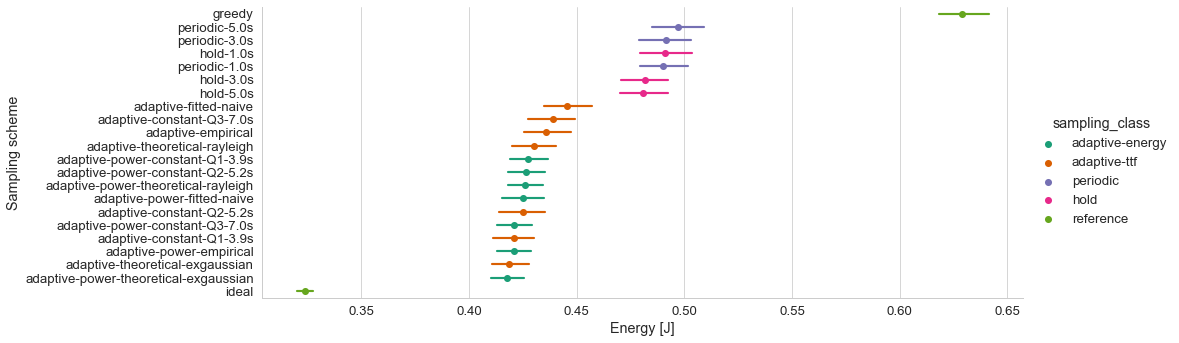

In [4]:
fg = sns.catplot(
    kind="point",
    errorbar=("ci", 95),
    data=results[results["rtt"] == results["rtt"].max()],
    y="sampling_scheme",
    order=reversed(energy_at_max_rtt.index),
    x="energy",
    join=False,
    hue="sampling_class",
    hue_order=["adaptive-energy", "adaptive-ttf", "periodic", "hold", "reference"],
    aspect=3,
)
# for ax in fg.axes.flat:
#     ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=55, ha="right", rotation_mode="anchor")

fg.set_axis_labels("Energy [J]", "Sampling scheme")
# fg.set(xscale="log", xlim=(0.1, 10))
plt.show()

In [5]:
ideal_energies_maxrtt = results.loc[(results["rtt"] == results["rtt"].max()) & (results["sampling_scheme"] == "ideal"), "energy"]
ideal_energies_maxrtt

243135    0.446940
243136    0.290706
243137    0.292285
243138    0.275235
243139    0.258715
            ...   
256315    0.259672
256316    0.324764
256317    0.381434
256318    0.318418
256319    0.254009
Name: energy, Length: 1350, dtype: float64

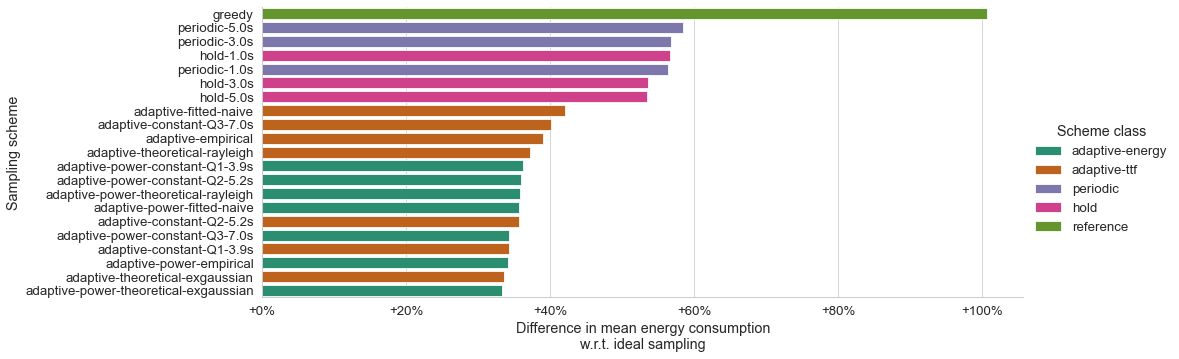

In [6]:
import numpy as np
import numpy.typing as npt
import matplotlib.ticker as tkr

def comp_to_ideal(energies: pd.Series) -> npt.NDArray:
    differences = np.subtract.outer(energies.to_numpy(), ideal_energies_maxrtt.to_numpy())
    rel_diff = np.divide(differences, ideal_energies_maxrtt.to_numpy()).flatten()
    result = pd.DataFrame(index=pd.Series(np.arange(rel_diff.size), name="sample"))
    result["percent_diff"] = rel_diff
    return result

reldiffs_wrt_ideal_max_rtt = (
    results.loc[(results["rtt"] == results["rtt"].max()) & (results["sampling_scheme"] != "ideal")]
    .groupby(["sampling_class", "sampling_scheme"], observed=True)
    ["energy"]
    .apply(comp_to_ideal)
    .reset_index()
)

scheme_order = (
        reldiffs_wrt_ideal_max_rtt
        .groupby("sampling_scheme")
        ["percent_diff"]
        .mean()
        .sort_values(ascending=False)
        .index
    )

fg = sns.catplot(
    kind="bar",
    data=reldiffs_wrt_ideal_max_rtt,
    errorbar=None,
    y="sampling_scheme",
    order=scheme_order,
    x="percent_diff",
    # join=False,
    dodge=False,
    hue="sampling_class",
    hue_order=["adaptive-energy", "adaptive-ttf", "periodic", "hold", "reference"],
    aspect=3,
)
for ax in fg.axes.flat:
    # pass
    # ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=55, ha="right", rotation_mode="anchor")
    ax.xaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: f"{y:+0.0%}"))
    # ax.xaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: f'{x}: Is that your best'))

fg.set_axis_labels("Difference in mean energy consumption\nw.r.t. ideal sampling", "Sampling scheme")
fg.legend.set_title("Scheme class")

plt.show()
del reldiffs_wrt_ideal_max_rtt

In [7]:
best_schemes = scheme_order[-5:]
best_schemes

CategoricalIndex(['adaptive-power-constant-Q3-7.0s',
                  'adaptive-constant-Q1-3.9s', 'adaptive-power-empirical',
                  'adaptive-theoretical-exgaussian',
                  'adaptive-power-theoretical-exgaussian'],
                 categories=['greedy', 'adaptive-empirical', 'adaptive-theoretical-exgaussian', 'adaptive-theoretical-rayleigh', 'adaptive-fitted-naive', 'adaptive-constant-Q1-3.9s', 'adaptive-constant-Q2-5.2s', 'adaptive-constant-Q3-7.0s', ...], ordered=True, dtype='category', name='sampling_scheme')

In [8]:
results_best = results[np.isin(results["sampling_scheme"], best_schemes)].copy()
results_best["sampling_scheme"] = results_best["sampling_scheme"].cat.remove_unused_categories()
results_best

,rtt,step,previous_ttf,execution_time,step_duration,ttf,wait_time,samples,cumulative_duration,cumulative_samples,repetition,energy,cumulative_energy,timing_model,sampling_scheme,sampling_class
0,1.0,1,1.000000,3.339578,4.410716,1.071138,0.071138,3,4.410716,3,6,0.129161,0.129161,empirical-high,adaptive-constant-Q1-3.9s,adaptive-ttf
1,1.0,2,1.071138,8.504468,9.631859,1.127392,0.127392,6,14.042575,9,6,0.270478,0.399639,empirical-high,adaptive-constant-Q1-3.9s,adaptive-ttf
2,1.0,3,1.127392,3.158377,5.106543,1.948166,0.948166,2,19.149118,11,6,0.118598,0.518237,empirical-high,adaptive-constant-Q1-3.9s,adaptive-ttf
3,1.0,4,1.948166,4.674564,7.103813,2.429250,1.429250,3,26.252932,14,6,0.169557,0.687794,empirical-high,adaptive-constant-Q1-3.9s,adaptive-ttf
4,1.0,5,2.429250,2.787680,3.991262,1.203582,0.203582,1,30.244194,15,6,0.080869,0.768663,empirical-high,adaptive-constant-Q1-3.9s,adaptive-ttf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175495,5.0,41,7.715617,9.380109,18.188051,8.807942,3.807942,2,582.917498,54,20,0.554821,16.357762,empirical-high,adaptive-theoretical-exgaussian,adaptive-ttf
175496,5.0,42,8.807942,33.812717,43.188051,9.375334,4.375334,7,626.105549,61,20,1.634821,17.992583,empirical-high,adaptive-theoretical-exgaussian,adaptive-ttf
175497,5.0,43,9.375334,9.446460,17.631157,8.184698,3.184698,2,643.736706,63,20,0.546467,18.539051,empirical-high,adaptive-theoretical-exgaussian,adaptive-ttf
175498,5.0,44,8.184698,7.203495,12.264704,5.061209,0.061209,1,656.001410,64,20,0.324971,18.864021,empirical-high,adaptive-theoretical-exgaussian,adaptive-ttf


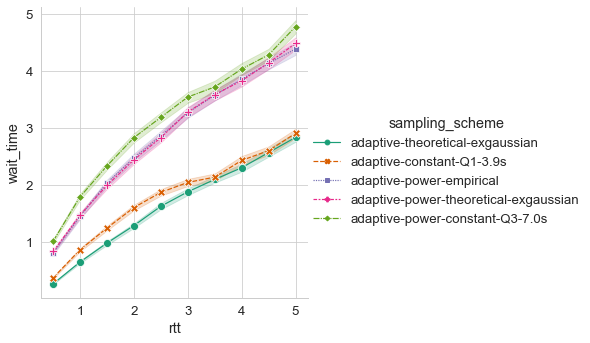

In [9]:
fg = sns.relplot(
    kind="line",
    errorbar=("ci", 95),
    data=results_best,
    x="rtt",
    y="wait_time",
    hue="sampling_scheme",
    style="sampling_scheme",
    markers=True,
    markersize=8,
)
plt.show()